In [1]:
from compressed_reconstruct import OCTReconstruction
import matplotlib.pyplot as plt
import numpy as np
import math

In [36]:
# Load the image file
image_path = '../data/LK2_180.jpg'
inputImg = plt.imread(image_path)
inputImg = np.array(inputImg)

In [37]:
print(np.shape(inputImg))

(382, 370)


In [38]:
diameter = 14*0.59
recon_size = 64
patch_size = 1
startX = 172
startY = 166
step_size = 2
step_interval = 3 # um
radius = (diameter/2)/(step_interval/step_size) 
z_depth = 0
print(radius)

2.7533333333333334


0


In [39]:
recon = OCTReconstruction(recon_size=recon_size,radius=radius,step_size=step_size, z0_plane=150)


In [40]:
I_rec_norm, I_init_orig =recon.reconstruct_patch_psf(startX, startY, inputImg, z_depth)

num_row_sensing 30
partial image (30, 30)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)


mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (640, 640)
mask_psf_i_2 (64

d:\anaconda\envs\cdl\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


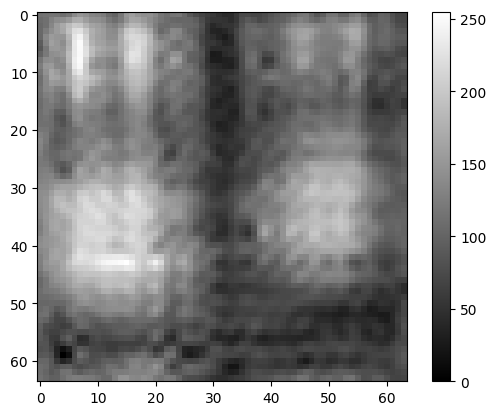

In [45]:
# Plot the array as an image
plt.imshow(I_rec_norm, cmap='gray')
plt.colorbar()  # Add a colorbar for reference
plt.show()

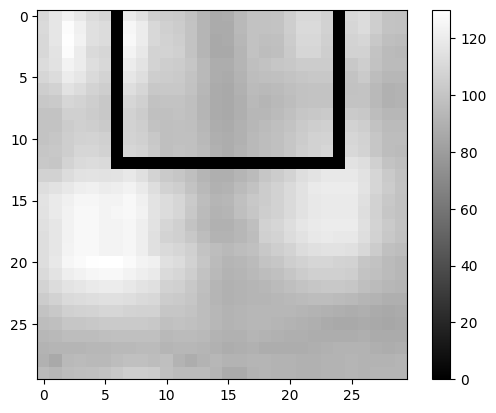

In [46]:
# Plot the array as an image
plt.imshow(I_init_orig, cmap='gray')
plt.colorbar()  # Add a colorbar for reference
plt.show()

In [47]:
import cv2

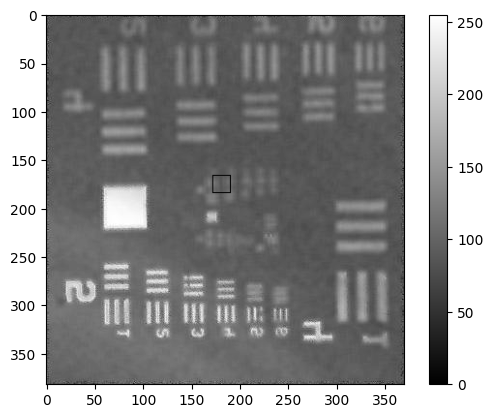

In [48]:
# Draw a rectangle on the image
cv2.rectangle(inputImg, (startX, startY), (startX + 18, startY + 18), 0, 1)

# Display the image with the rectangle
# Plot the array as an image
plt.imshow(inputImg, cmap='gray')
plt.colorbar()  # Add a colorbar for reference
plt.show()
